In [3]:
import pandas as pd
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.datasets import load_diabetes
from dtreeviz.trees import dtreeviz

In [4]:
iris = load_iris()

In [5]:
print(iris.data[0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [6]:
print(iris.target[0:5])

[0 0 0 0 0]


In [7]:
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(iris.data, iris.target) 

In [13]:
viz = dtreeviz(clf,
               iris.data,
               iris.target,
               target_name='variety',
               feature_names=iris.feature_names,
               class_names=[str(i) for i in iris.target_names],
              )

In [15]:
viz.view()

In [17]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

# ランダムフォレスト

In [39]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [19]:
wine = load_wine()

In [31]:
x = wine.data
y = wine.target
features = wine.feature_names

In [23]:
model = RandomForestClassifier(n_estimators=250, random_state=42)
model.fit(x, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [25]:
# 重要度の取り出し
importance = model.feature_importances_

In [26]:
importance

array([0.1234456 , 0.02766905, 0.0151606 , 0.03053054, 0.02805836,
       0.0464776 , 0.17589757, 0.00842494, 0.02256246, 0.16759517,
       0.07838747, 0.10649693, 0.1692937 ])

In [32]:
# print(sorted(zip(map(lambda x: round(x, 2), model.feature_importances_), features), reverse=True))

[(0.18, 'flavanoids'), (0.17, 'proline'), (0.17, 'color_intensity'), (0.12, 'alcohol'), (0.11, 'od280/od315_of_diluted_wines'), (0.08, 'hue'), (0.05, 'total_phenols'), (0.03, 'malic_acid'), (0.03, 'magnesium'), (0.03, 'alcalinity_of_ash'), (0.02, 'proanthocyanins'), (0.02, 'ash'), (0.01, 'nonflavanoid_phenols')]


In [57]:
# 重要度を降順に並び替え
ranking = np.argsort(-importance)

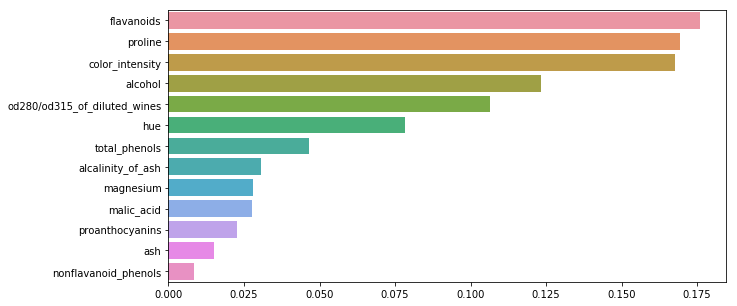

In [58]:
# 重要度のプロット
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(x=model.feature_importances_[ranking], y=np.array(wine.feature_names)[ranking])